# Prediction of Covid using a Deep Learning model with images


In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers

import matplotlib.pyplot as plt
import numpy


2023-05-08 00:57:07.593330: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [20]:

DIRECTORY = "/home/fran/Downloads/codecademy_proyects/Deep_learning_TF/Classification/classification-challenge/classification-challenge/classification-challenge-starter/Covid19-dataset"
CLASS_MODE = "categorical"
COLOR_MODE = "grayscale"
TARGET_SIZE = (256,256)
BATCH_SIZE = 32

In [21]:
training_data_generator = ImageDataGenerator(rescale=1.0/255,

#Randomly increase or decrease the size of the image by up to 10%
zoom_range=0.1, 

#Randomly rotate the image between -25,25 degrees
rotation_range=25, 
width_shift_range=0.05, 

#Shift the image along its height by up to +/- 5%
height_shift_range=0.05,

)

In [24]:
data_generator = ImageDataGenerator()

#Creates a DirectoryIterator object using the above parameters:

training_iterator = training_data_generator.flow_from_directory(
                                                       DIRECTORY+"/train",
                                                       class_mode=CLASS_MODE,
                                                       color_mode=COLOR_MODE,
                                                       target_size=TARGET_SIZE,
                                                       batch_size=BATCH_SIZE)

validation_data_generator = ImageDataGenerator()

validation_iterator = validation_data_generator.flow_from_directory(
                                                       DIRECTORY+"/train",
                                                       class_mode=CLASS_MODE,
                                                       color_mode=COLOR_MODE,
                                                       target_size=TARGET_SIZE,
                                                       batch_size=BATCH_SIZE)


sample_batch_input,sample_batch_labels  = training_iterator.next()
 
print(sample_batch_input.shape,sample_batch_labels.shape)

#Print its attributes:
print(training_data_generator.__dict__)

Found 251 images belonging to 3 classes.
Found 251 images belonging to 3 classes.
(32, 256, 256, 1) (32, 3)
{'featurewise_center': False, 'samplewise_center': False, 'featurewise_std_normalization': False, 'samplewise_std_normalization': False, 'zca_whitening': False, 'zca_epsilon': 1e-06, 'rotation_range': 25, 'width_shift_range': 0.05, 'height_shift_range': 0.05, 'shear_range': 0.0, 'zoom_range': [0.9, 1.1], 'channel_shift_range': 0.0, 'fill_mode': 'nearest', 'cval': 0.0, 'horizontal_flip': False, 'vertical_flip': False, 'rescale': 0.00392156862745098, 'preprocessing_function': None, 'dtype': 'float32', 'interpolation_order': 1, 'data_format': 'channels_last', 'channel_axis': 3, 'row_axis': 1, 'col_axis': 2, '_validation_split': 0.0, 'mean': None, 'std': None, 'zca_whitening_matrix': None, 'brightness_range': None}


In [27]:
model = keras.Sequential(
        #Add an input layer that will expect grayscale input images of size 256x256:
    [   keras.Input(shape=(255,255,1)),
     
        #Use a Flatten() layer to flatten the image into a single vector:
        #layers.Flatten(),
        
        # convolutional hidden layers with relu functions
        # maxpooling layers and dropout layers as well
        layers.Conv2D(5, 5, strides=3, activation="relu"),
        layers.MaxPooling2D(
                        pool_size=(2, 2), strides=(2,2)),
        layers.Dropout(0.1),

        layers.Conv2D(3, 3, strides=1, activation="relu"),
        layers.MaxPooling2D(
                        pool_size=(2, 2), strides=(2,2)),
        layers.Dropout(0.2),

        layers.Flatten(),
        # output layer with softmax activation function
        layers.Dense(3,activation="softmax")
    ]
)
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=.001), 
    loss=tf.keras.losses.CategoricalCrossentropy(), 
    metrics=[tf.keras.metrics.CategoricalAccuracy(),tf.keras.metrics.AUC()])

print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 84, 84, 5)         130       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 42, 42, 5)        0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 42, 42, 5)         0         
                                                                 
 conv2d_3 (Conv2D)           (None, 40, 40, 3)         138       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 20, 20, 3)        0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 20, 20, 3)        

In [28]:
# early stopping implementation
es = EarlyStopping(monitor='val_auc', mode='min', verbose=1, patience=20)

In [29]:
# fit the model with 10 ephochs and early stopping
history =model.fit(
        training_iterator,
        steps_per_epoch=training_iterator.samples/BATCH_SIZE, epochs=5,
        validation_data=validation_iterator,
        validation_steps=validation_iterator.samples/BATCH_SIZE,
        callbacks=[es])


Epoch 1/5
7/7 [==============================] - 4s 391ms/step - loss: 1.0975 - categorical_accuracy: 0.3187 - auc: 0.5255 - val_loss: 8.7035 - val_categorical_accuracy: 0.2629 - val_auc: 0.4155
Epoch 2/5
7/7 [==============================] - 3s 386ms/step - loss: 1.0681 - categorical_accuracy: 0.4422 - auc: 0.6159 - val_loss: 9.5034 - val_categorical_accuracy: 0.2271 - val_auc: 0.4197
Epoch 3/5
7/7 [==============================] - 3s 374ms/step - loss: 1.0311 - categorical_accuracy: 0.4502 - auc: 0.6682 - val_loss: 22.2269 - val_categorical_accuracy: 0.4821 - val_auc: 0.6071
Epoch 4/5
7/7 [==============================] - 3s 349ms/step - loss: 0.9648 - categorical_accuracy: 0.5219 - auc: 0.7468 - val_loss: 19.7787 - val_categorical_accuracy: 0.5538 - val_auc: 0.6760
Epoch 5/5
7/7 [==============================] - 3s 355ms/step - loss: 0.8664 - categorical_accuracy: 0.6932 - auc: 0.8611 - val_loss: 29.9636 - val_categorical_accuracy: 0.5896 - val_auc: 0.6995


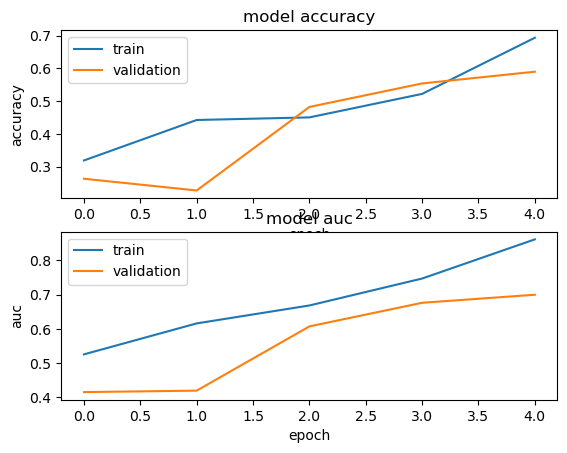

In [30]:
# plotting categorical and validation accuracy over epochs
fig = plt.figure()
ax1 = fig.add_subplot(2, 1, 1)
ax1.plot(history.history['categorical_accuracy'])
ax1.plot(history.history['val_categorical_accuracy'])
ax1.set_title('model accuracy')
ax1.set_xlabel('epoch')
ax1.set_ylabel('accuracy')
ax1.legend(['train', 'validation'], loc='upper left')

# plotting auc and validation auc over epochs
ax2 = fig.add_subplot(2, 1, 2)
ax2.plot(history.history['auc'])
ax2.plot(history.history['val_auc'])
ax2.set_title('model auc')
ax2.set_xlabel('epoch')
ax2.set_ylabel('auc')
ax2.legend(['train', 'validation'], loc='upper left')

plt.show()

In [31]:
test_steps_per_epoch = numpy.math.ceil(validation_iterator.samples / validation_iterator.batch_size)
predictions = model.predict(validation_iterator, steps=test_steps_per_epoch)
test_steps_per_epoch = numpy.math.ceil(validation_iterator.samples / validation_iterator.batch_size)
predicted_classes = numpy.argmax(predictions, axis=1)
true_classes = validation_iterator.classes
class_labels = list(validation_iterator.class_indices.keys())
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)  

8/8 [==============================] - 1s 69ms/step
              precision    recall  f1-score   support

       Covid       0.46      0.86      0.60       111
      Normal       0.50      0.01      0.03        70
   Pneumonia       0.33      0.20      0.25        70

    accuracy                           0.44       251
   macro avg       0.43      0.36      0.29       251
weighted avg       0.44      0.44      0.34       251



In [33]:
cm=confusion_matrix(true_classes,predicted_classes)
cm

array([[96,  1, 14],
       [55,  1, 14],
       [56,  0, 14]])